In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing file 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [4]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [7]:
df.shape

(31647, 18)

In [8]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# Checking Null Values

In [9]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

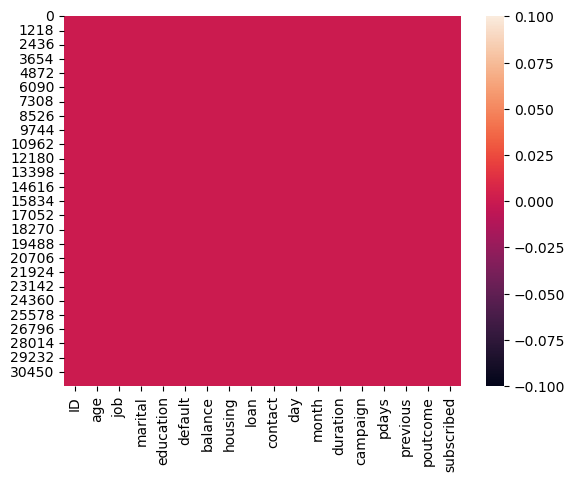

In [10]:
sns.heatmap(df.isnull())

# Splitting data into categorical and numerical

In [12]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical col",categorical_col)
print("\n")



Categorical col ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']




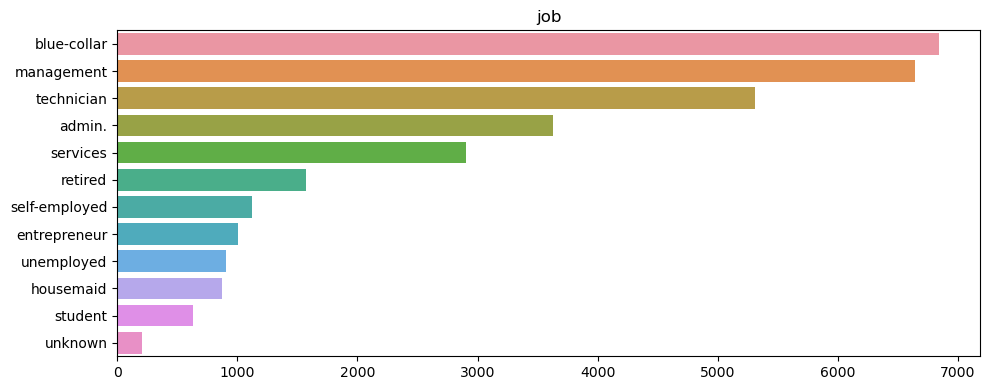

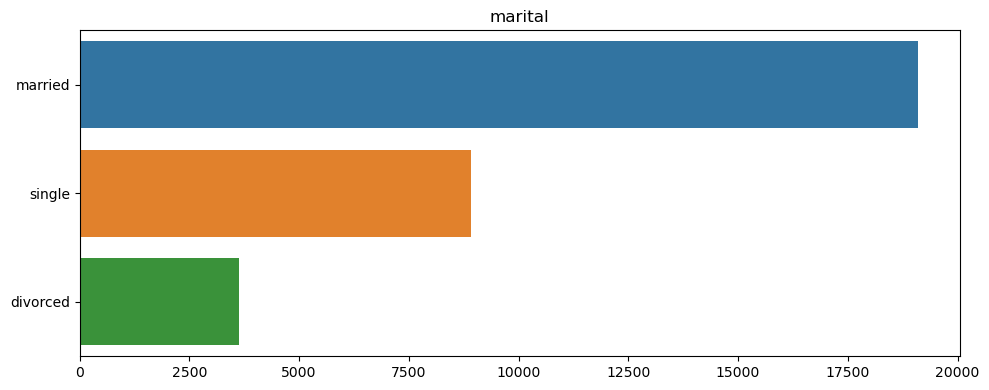

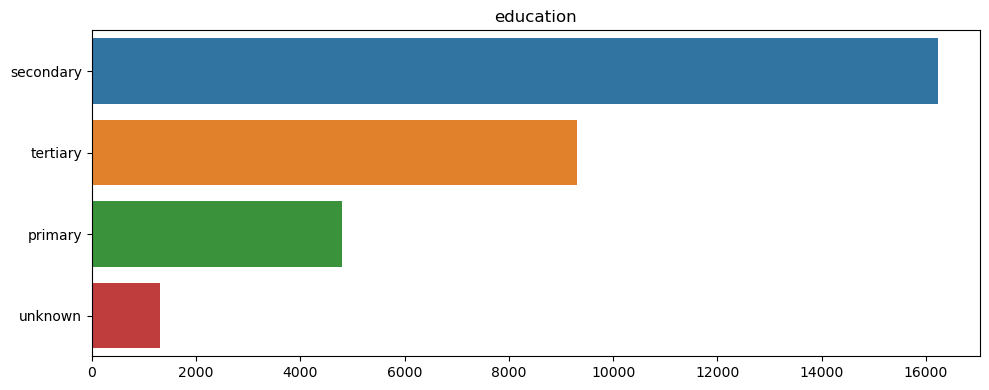

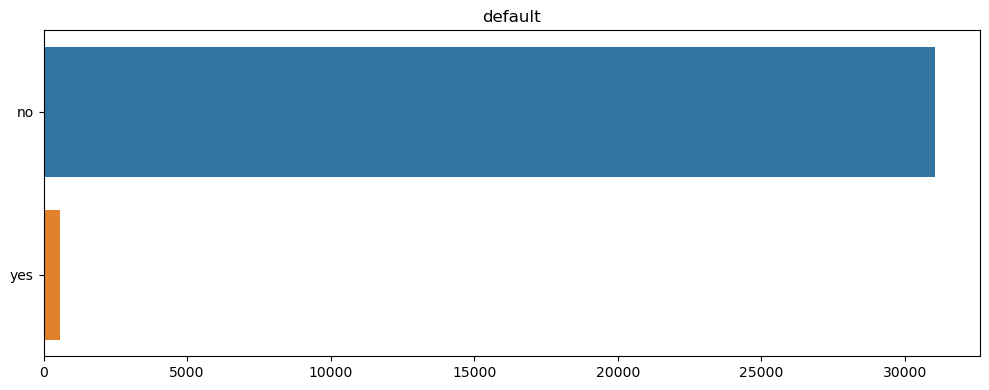

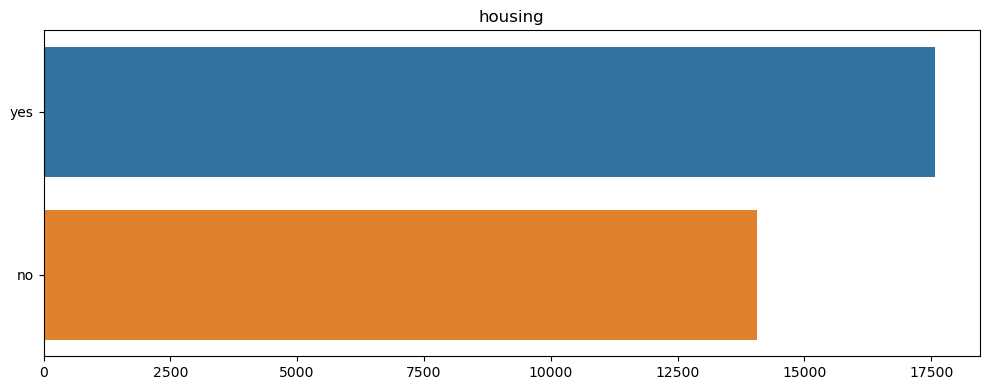

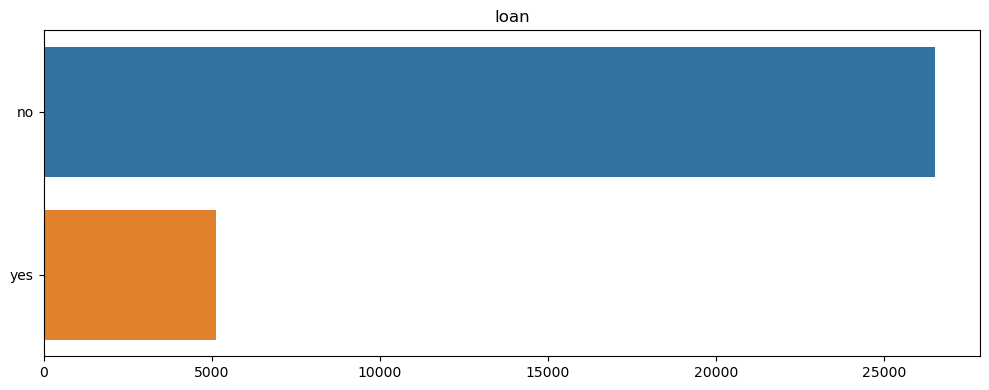

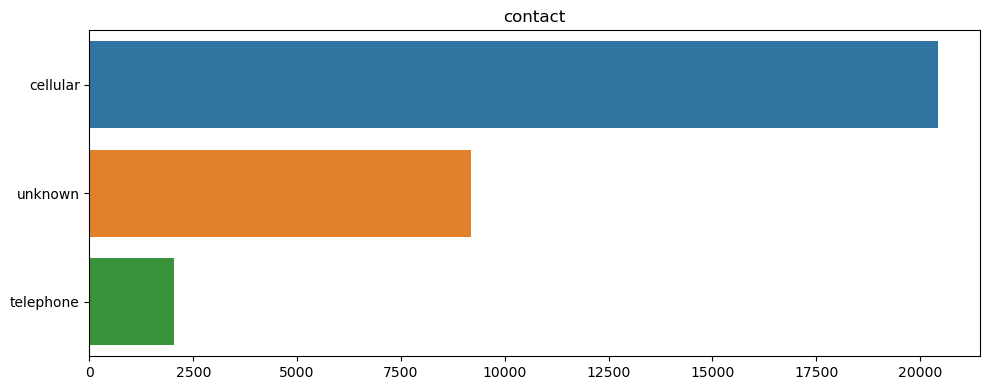

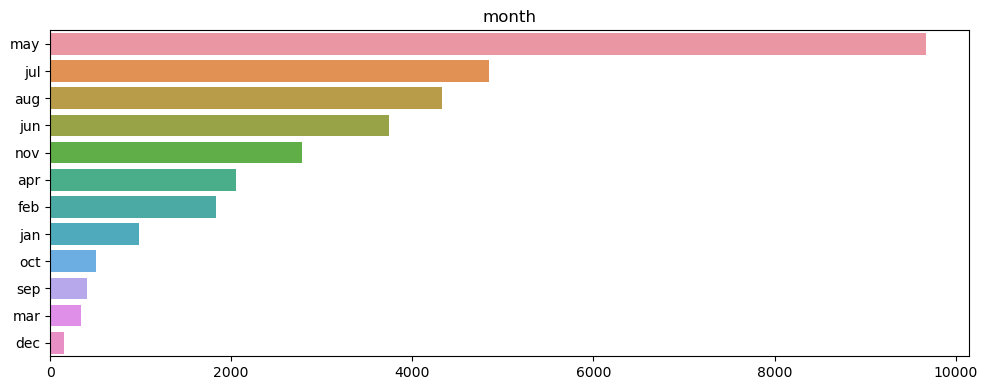

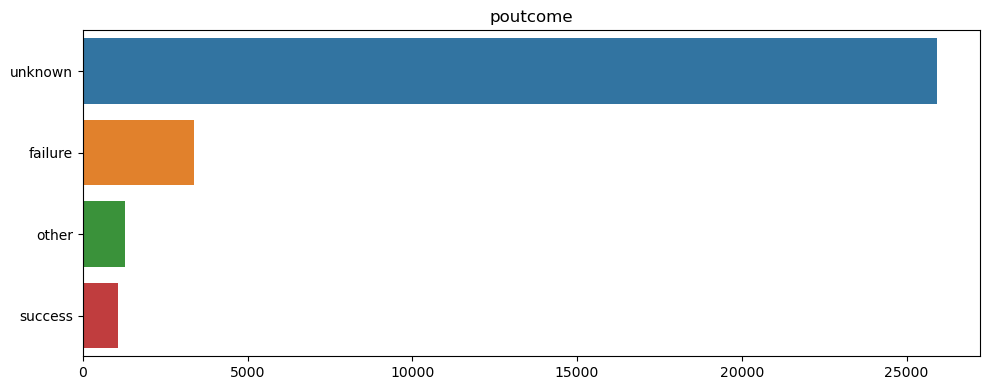

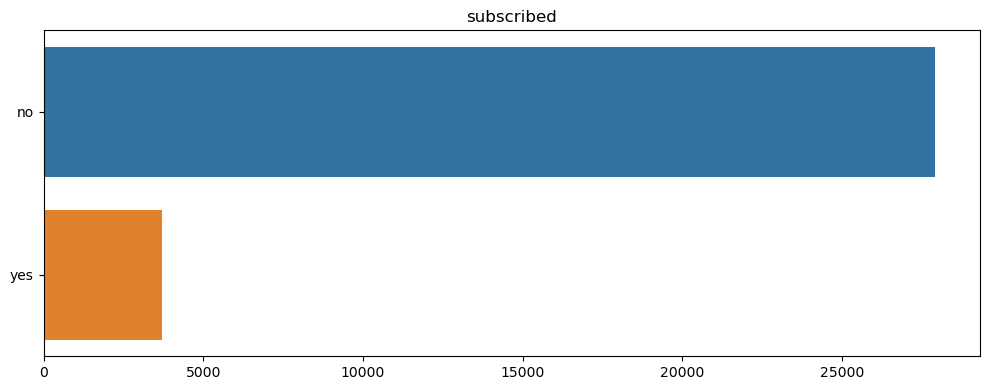

In [14]:
for col in categorical_col:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
     

# Converting Target Variable into Numerical

In [15]:
# Convert target variable into numeric
df.subscribed = df.subscribed.map({'no':0, 'yes':1})
 

In [16]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


# Dropping unnecessary columns

In [18]:
df.drop(['marital'],axis=1,inplace=True)
df.drop(['contact'],axis=1,inplace=True)


In [19]:
df.head()

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,unknown,no,1933,no,no,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,secondary,no,3,no,no,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,secondary,no,891,yes,no,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,tertiary,no,3287,no,no,22,jun,867,1,84,3,success,1
4,29842,31,technician,secondary,no,119,yes,no,4,feb,380,1,-1,0,unknown,0


In [20]:
df.shape

(31647, 16)

# Changing Categorical into Numerical variable

In [21]:
df[['default','housing','loan']]=df[['default','housing','loan']].replace(["yes","no"],["1","0"])
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])

df.head()


,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,unknown,0,1933,0,0,19,11,44,2,-1,0,unknown,0
1,40576,31,other,secondary,0,3,0,0,20,7,91,2,-1,0,unknown,0
2,15320,27,services,secondary,0,891,1,0,18,7,240,1,-1,0,unknown,0
3,43962,57,management,tertiary,0,3287,0,0,22,6,867,1,84,3,success,1
4,29842,31,technician,secondary,0,119,1,0,4,2,380,1,-1,0,unknown,0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['poutcome']=le.fit_transform(df['poutcome'])
df.head()

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,3,0,1933,0,0,19,11,44,2,-1,0,3,0
1,40576,31,5,1,0,3,0,0,20,7,91,2,-1,0,3,0
2,15320,27,8,1,0,891,1,0,18,7,240,1,-1,0,3,0
3,43962,57,4,2,0,3287,0,0,22,6,867,1,84,3,2,1
4,29842,31,10,1,0,119,1,0,4,2,380,1,-1,0,3,0


# Statistical summary

In [25]:
df.describe()

,ID,age,job,education,balance,day,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.687174,1.225013,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.660207,0.749195,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,8.000000,2.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,3.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


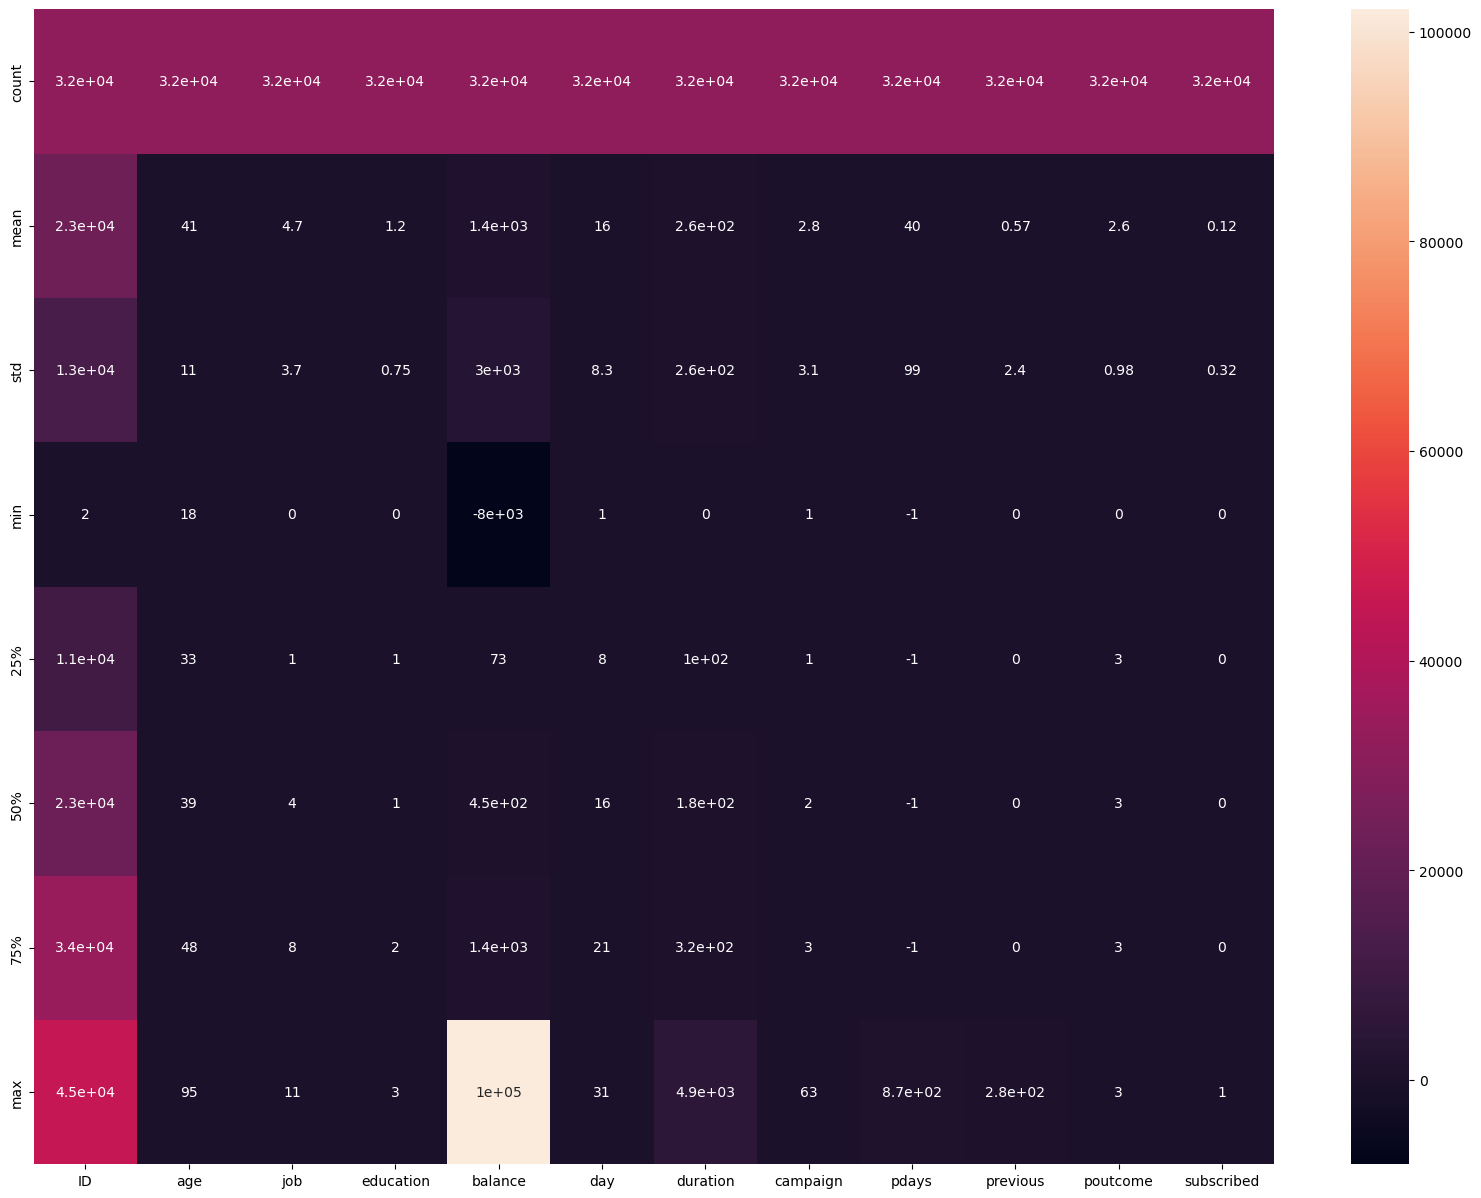

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(),annot=True)
plt.show()

# Correlation

In [27]:
df.corr()

,ID,age,job,education,balance,day,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.063197,0.096480,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.019199,-0.102356,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.063197,-0.019199,1.000000,0.140478,0.017533,0.021775,0.004685,-0.002649,-0.019270,-0.002080,0.004263,0.039860
education,0.096480,-0.102356,0.140478,1.000000,0.065176,0.017902,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
balance,0.067897,0.103245,0.017533,0.065176,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
day,-0.063399,-0.011056,0.021775,0.017902,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600
duration,0.007183,-0.003870,0.004685,0.003842,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.009771,0.389838
campaign,-0.103508,0.005733,-0.002649,0.006142,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,0.100720,-0.070607
pdays,0.436148,-0.021947,-0.019270,-0.001566,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,-0.857716,0.108290
previous,0.254476,0.005761,-0.002080,0.015280,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,-0.463034,0.088081


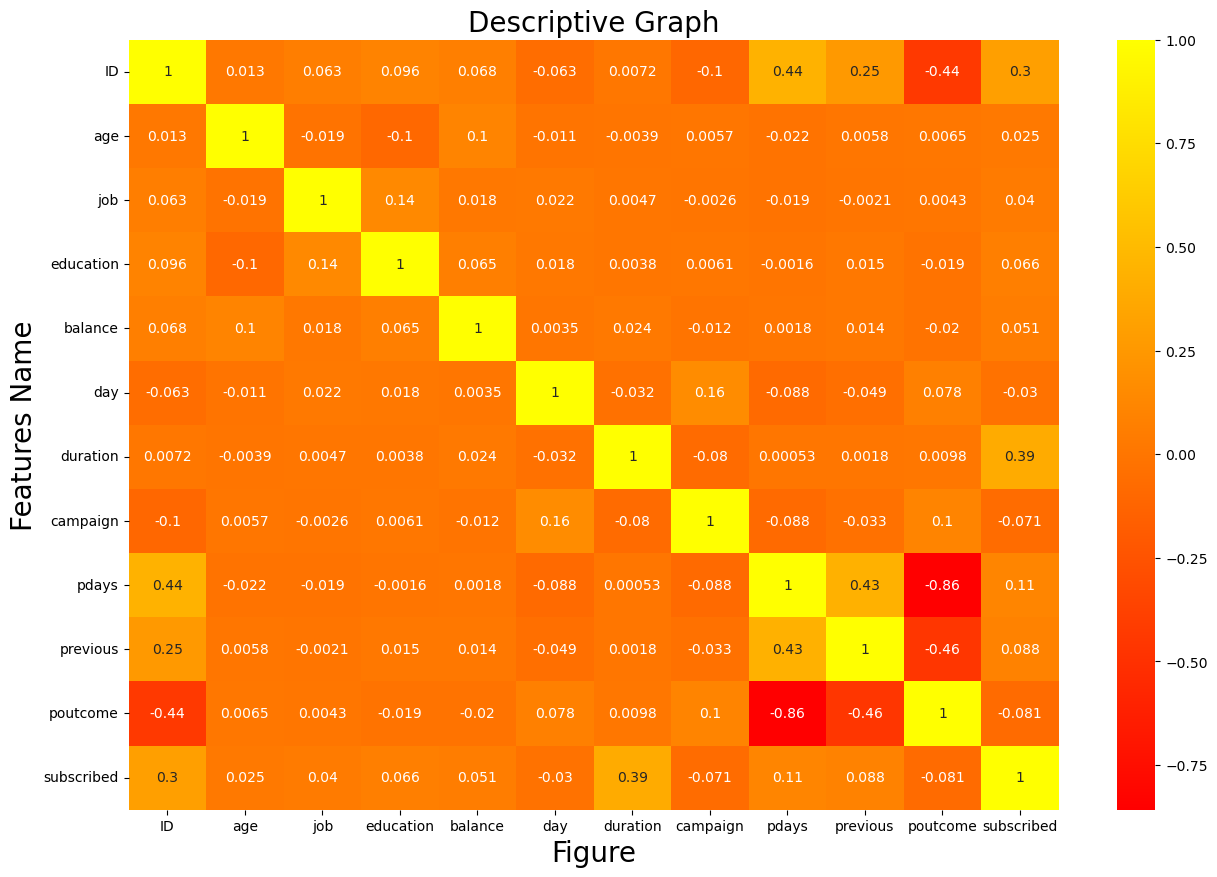

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor='black',cmap='autumn')
plt.xlabel("Figure",fontsize=20)
plt.ylabel("Features Name",fontsize=20)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

# Visualising Data

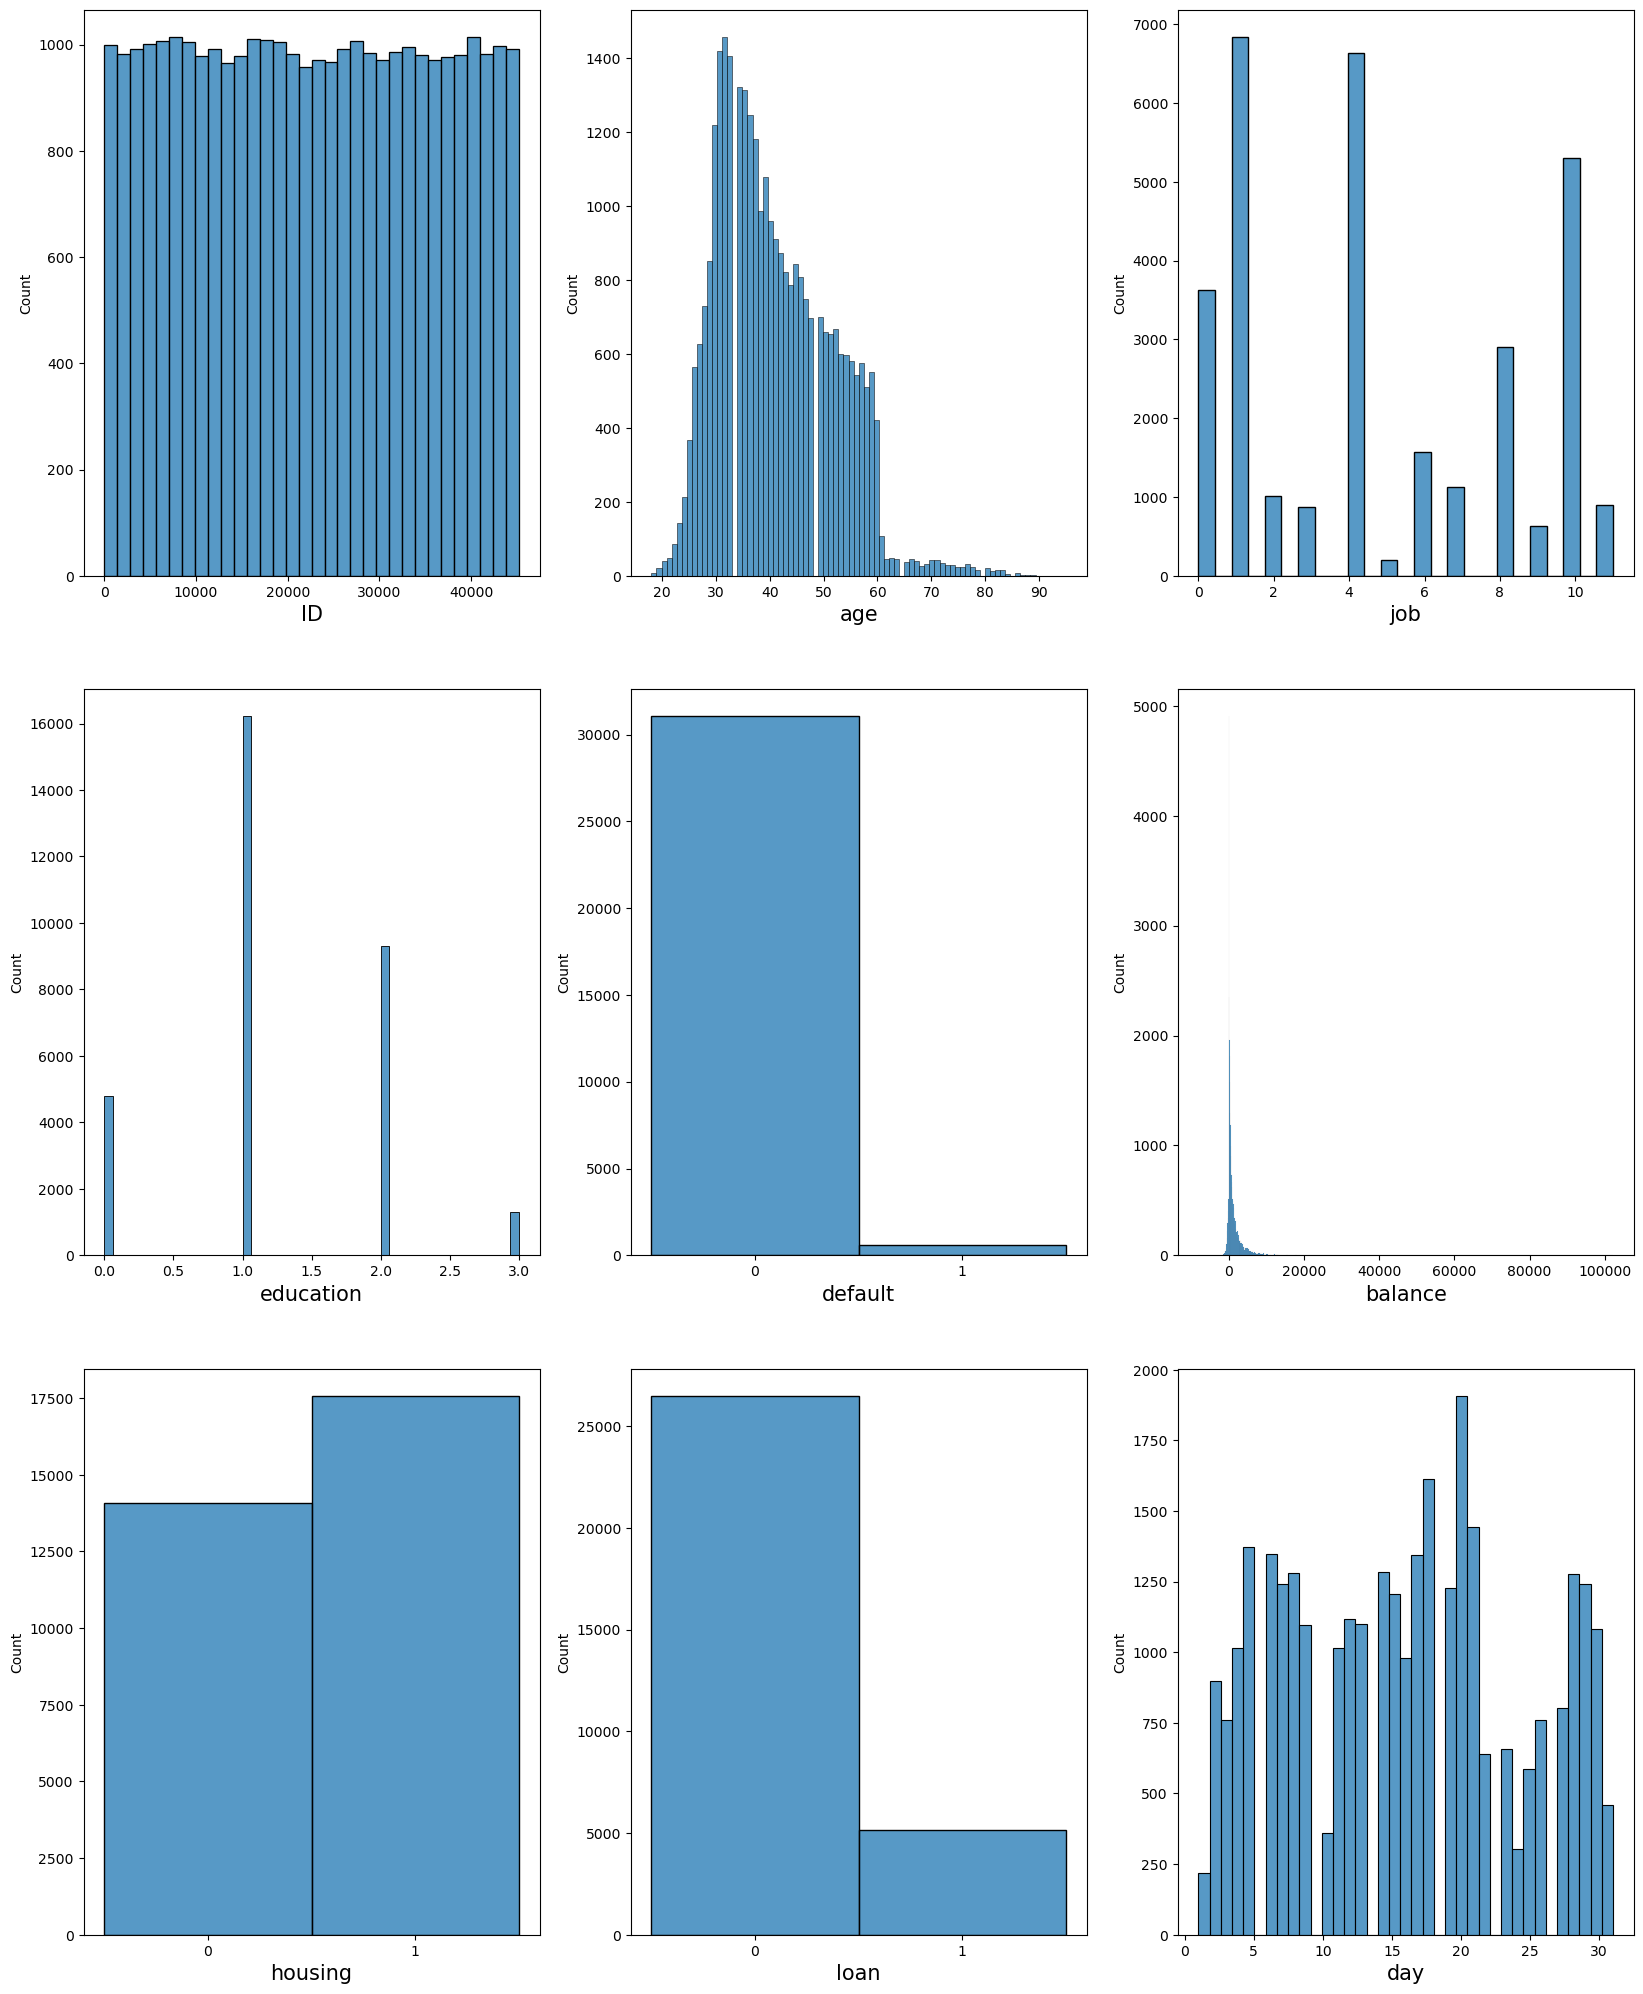

In [30]:
#visaulize the normal distribution of the column by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()  


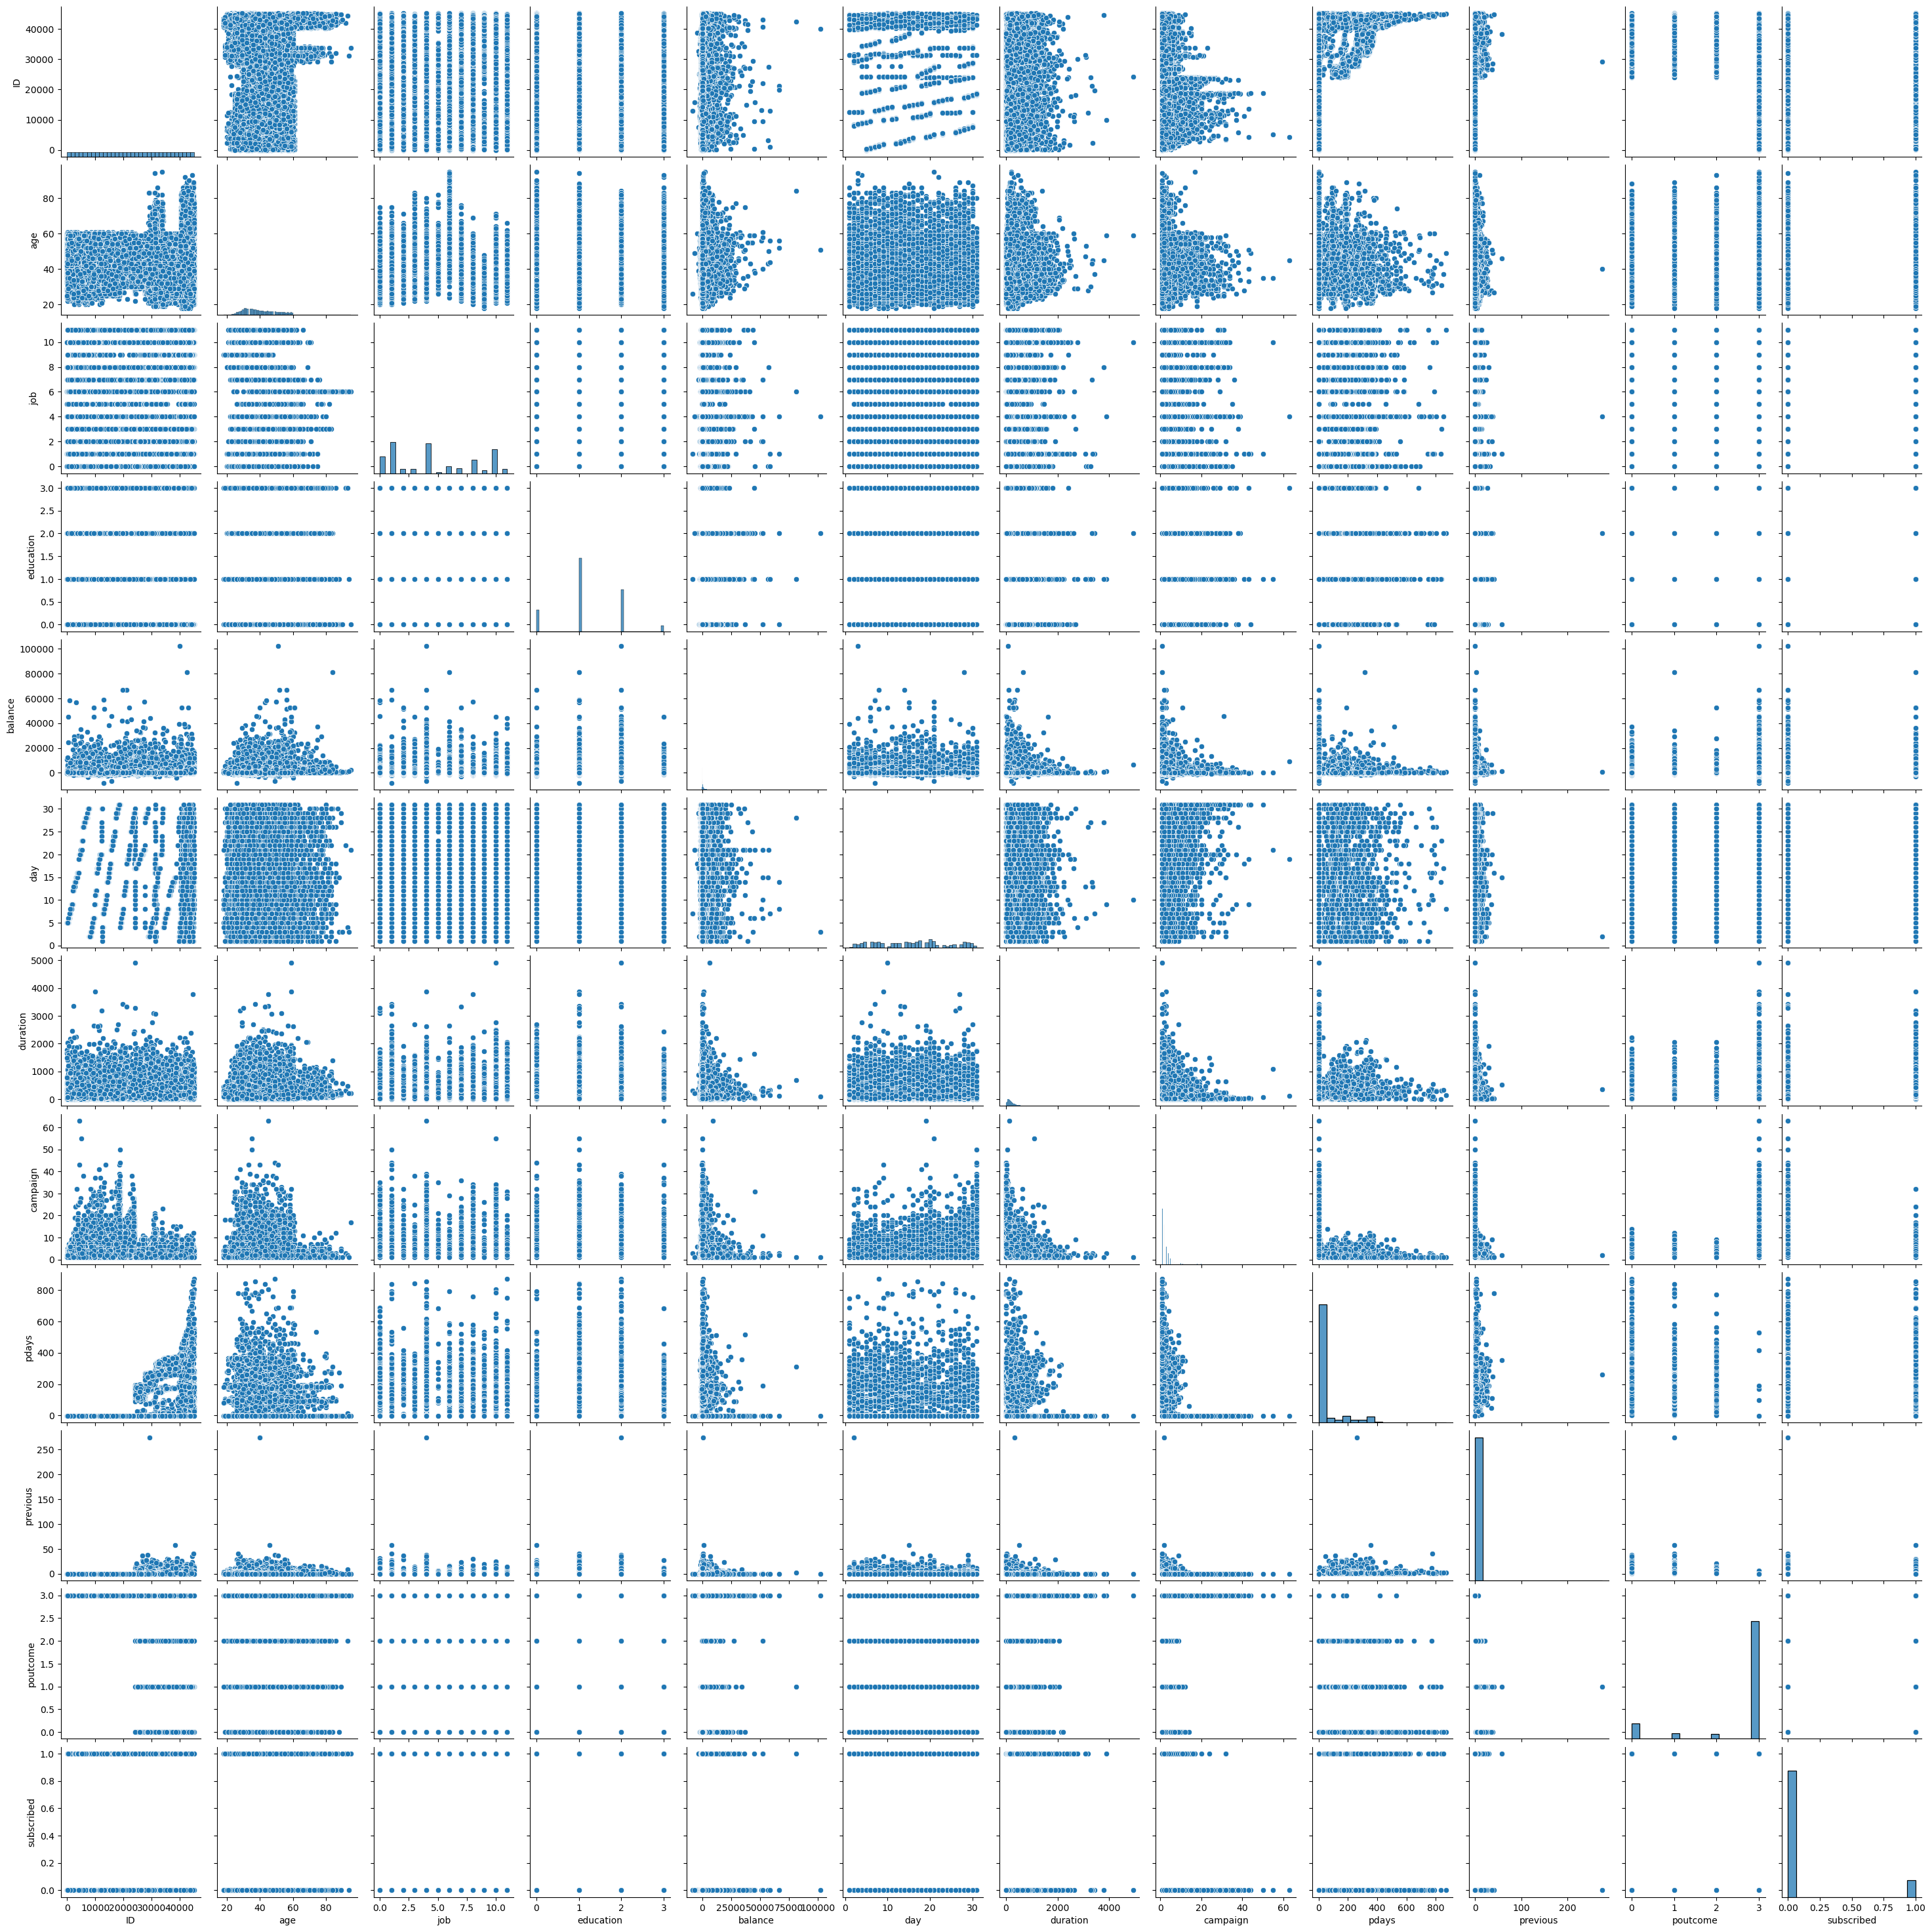

In [31]:
sns.pairplot(data=df)

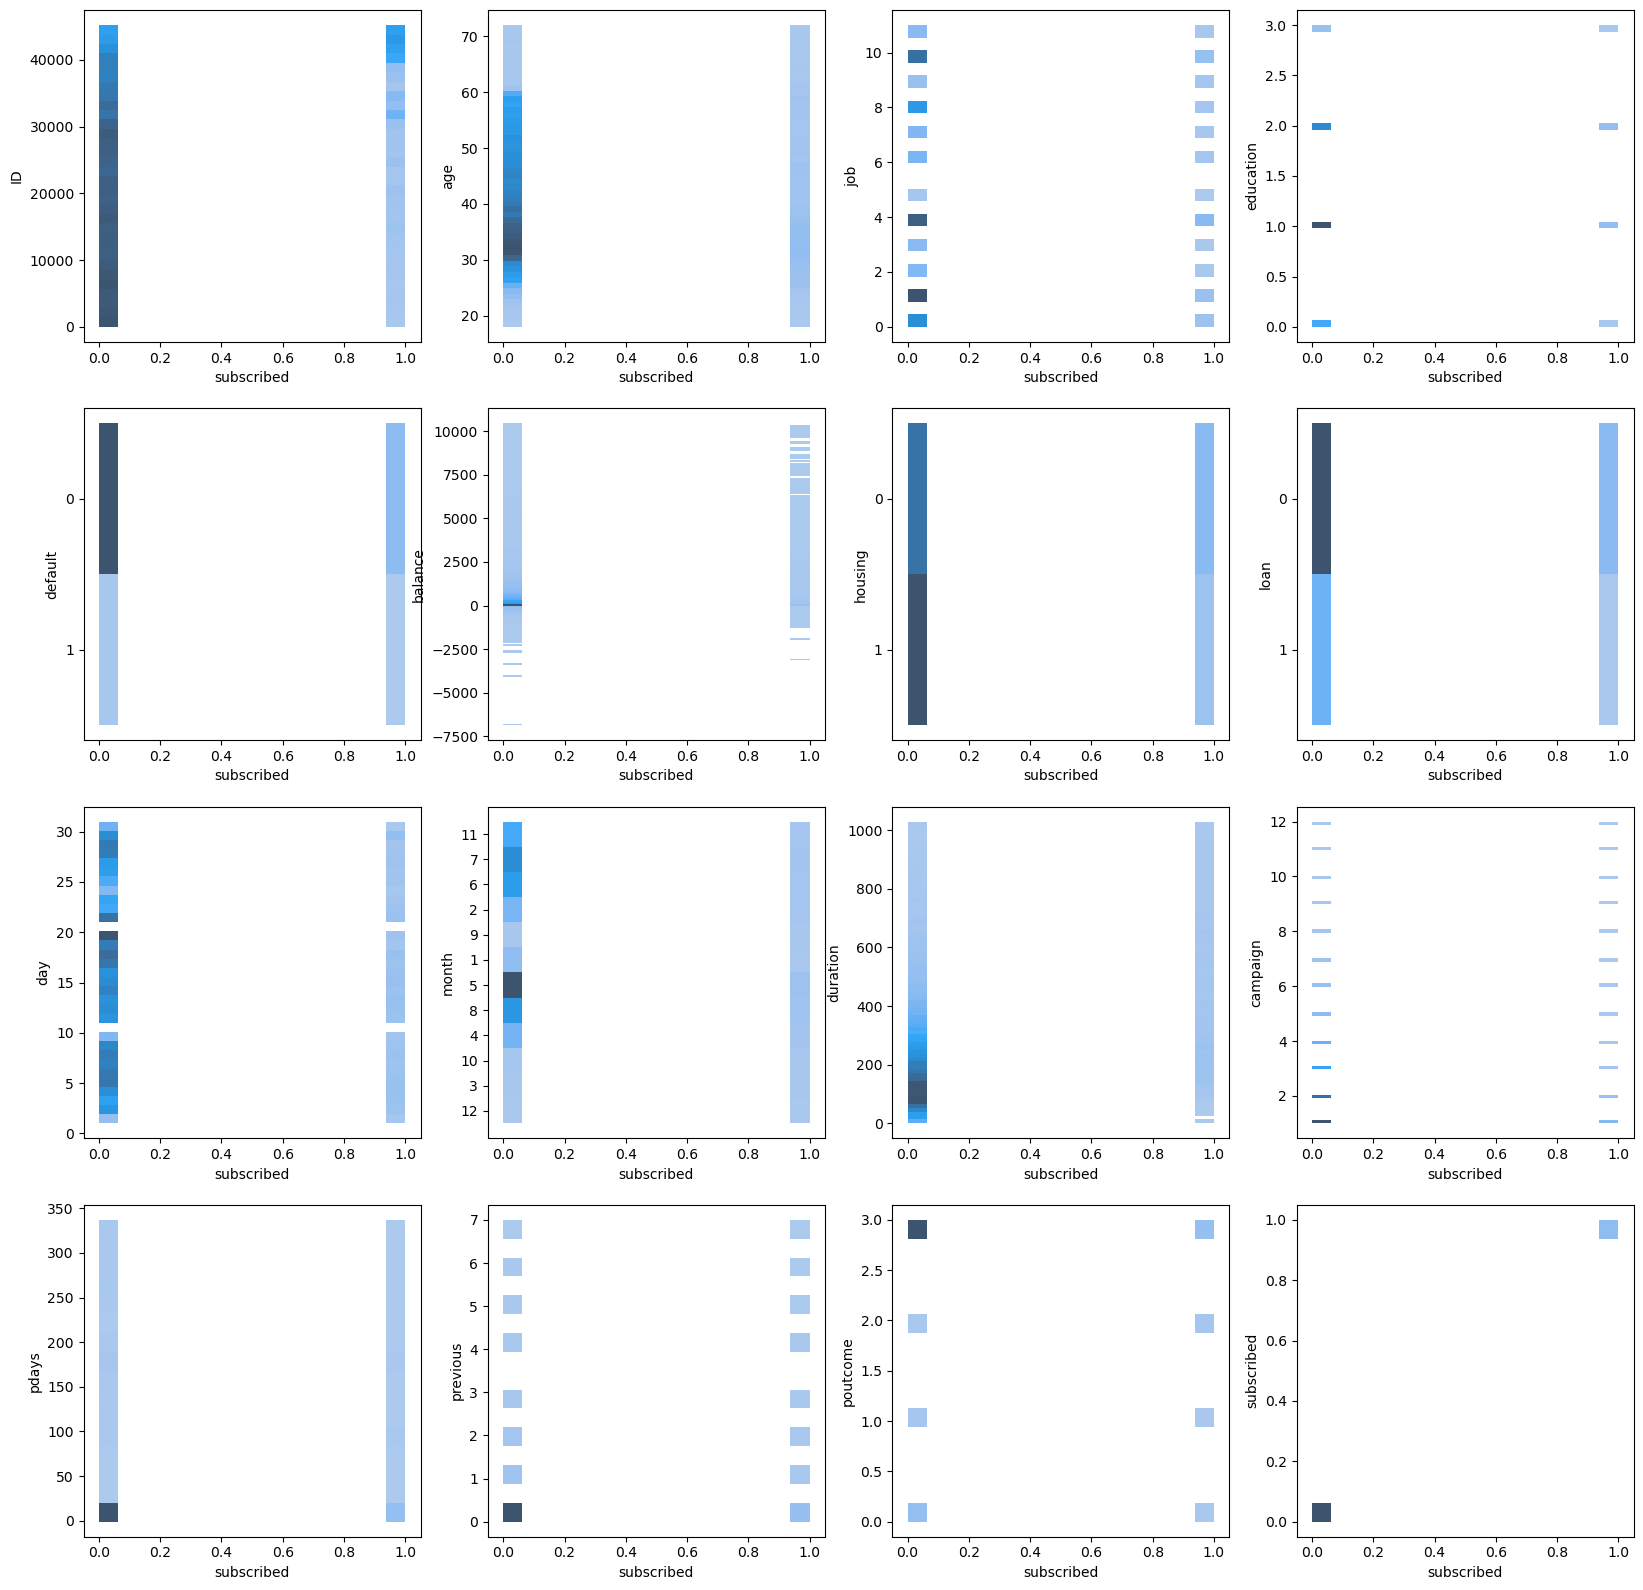

In [53]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=20:
        plt.subplot(5,4,p)
        sns.histplot(x="subscribed",y=i,data=df)
        plt.xlabel("subscribed")
        plt.ylabel(i)
    p+=1
plt.show()

<AxesSubplot:>

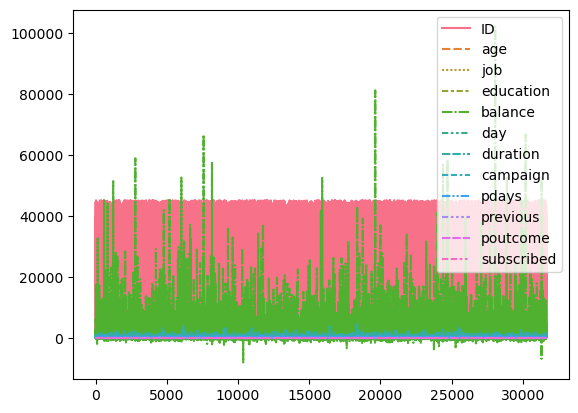

In [32]:
sns.lineplot(data=df)

<AxesSubplot:xlabel='subscribed', ylabel='age'>

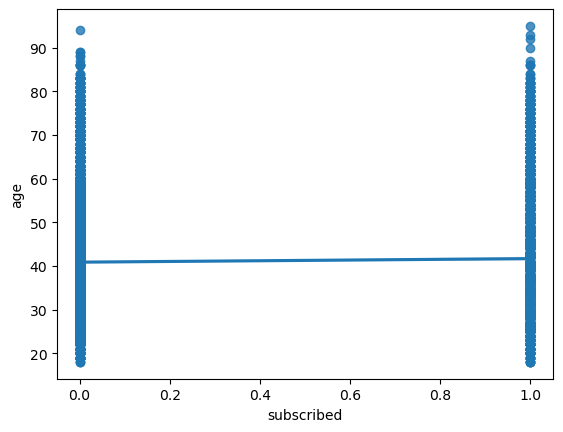

In [36]:
sns.regplot(x='subscribed',y='age',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='job'>

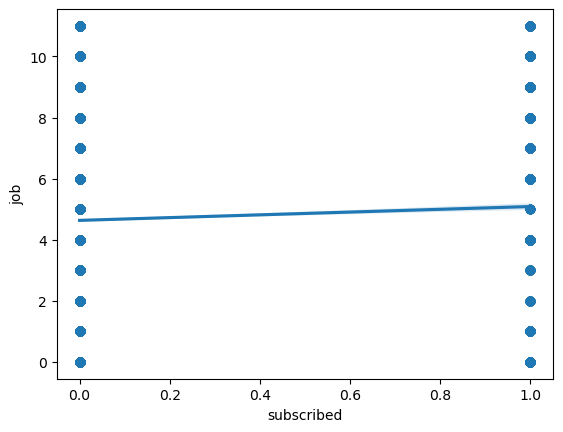

In [37]:
sns.regplot(x='subscribed',y='job',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='education'>

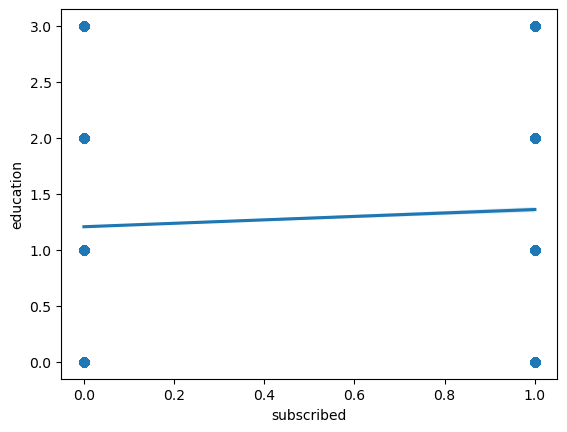

In [39]:
sns.regplot(x='subscribed',y='education',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

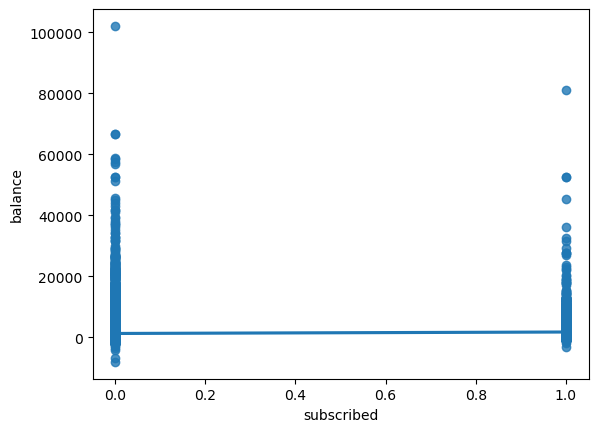

In [40]:
sns.regplot(x='subscribed',y='balance',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='day'>

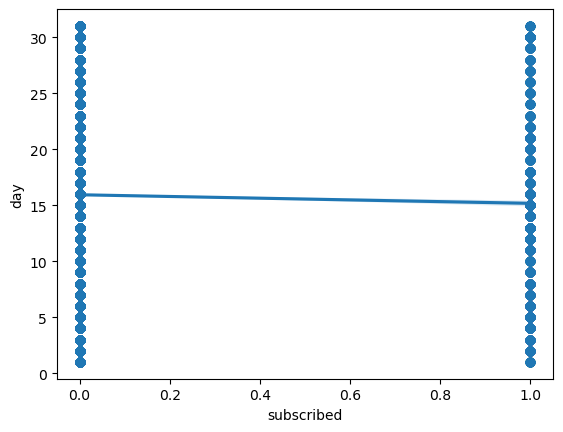

In [41]:
sns.regplot(x='subscribed',y='day',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

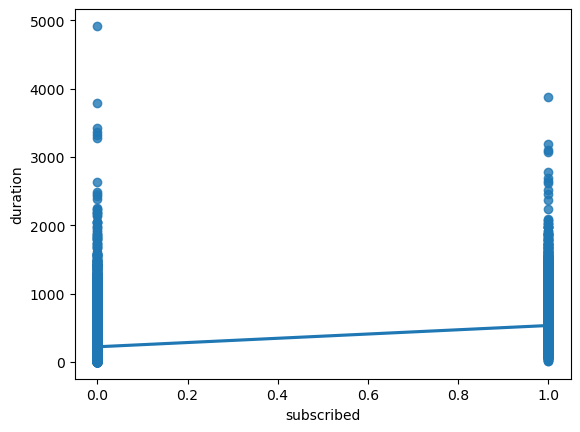

In [42]:
sns.regplot(x='subscribed',y='duration',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='campaign'>

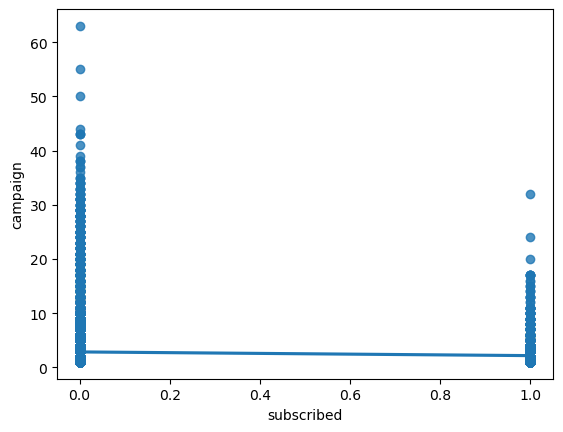

In [43]:
sns.regplot(x='subscribed',y='campaign',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='pdays'>

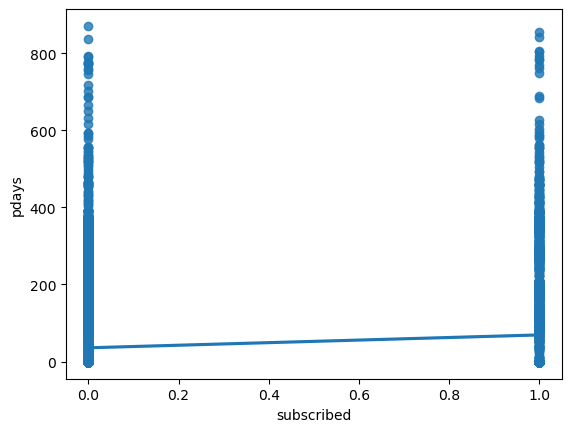

In [44]:
sns.regplot(x='subscribed',y='pdays',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='previous'>

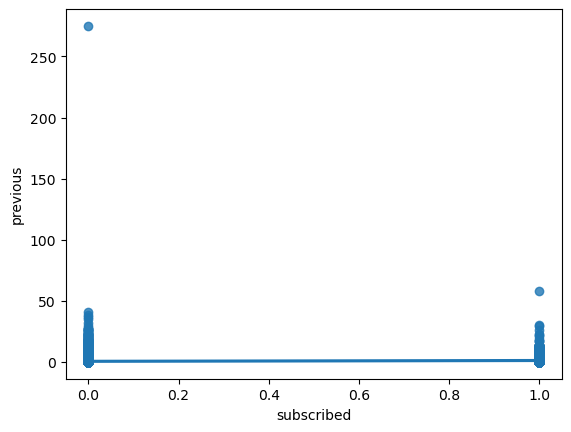

In [45]:
sns.regplot(x='subscribed',y='previous',data=df)

<AxesSubplot:xlabel='subscribed', ylabel='poutcome'>

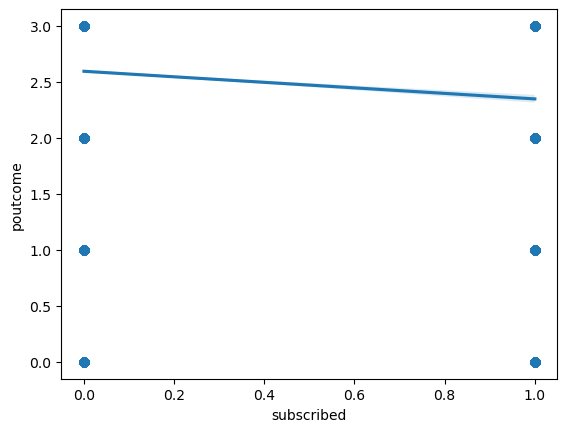

In [46]:
sns.regplot(x='subscribed',y='poutcome',data=df)

# Outliers

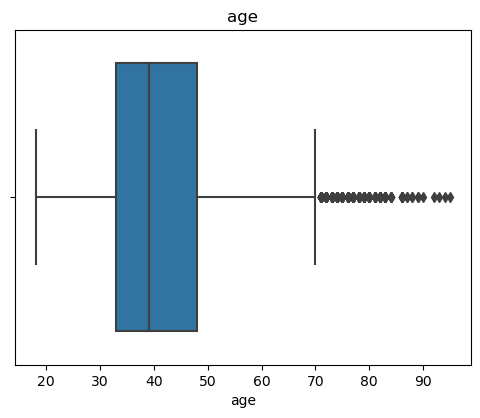

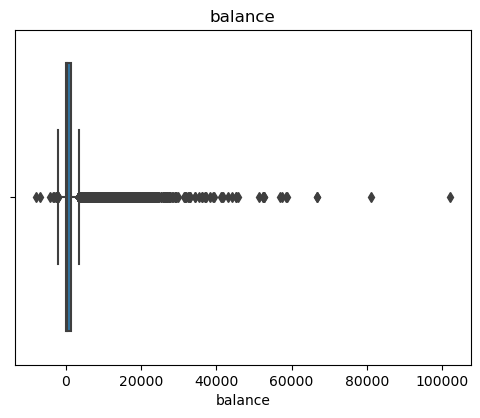

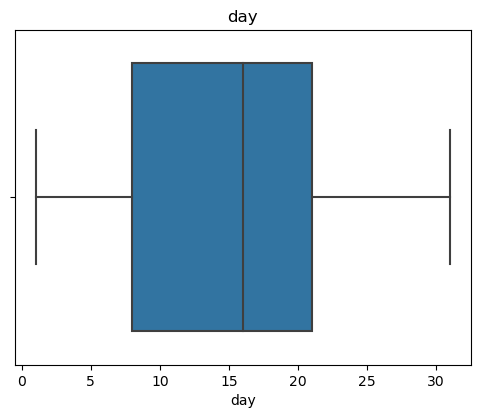

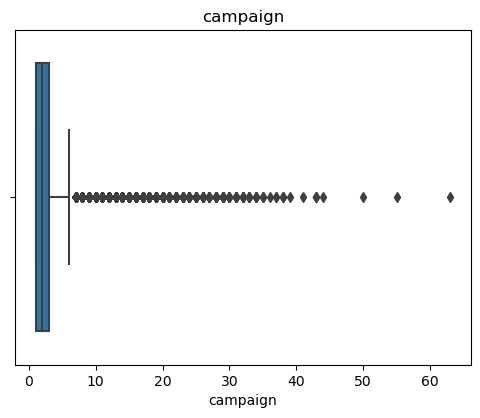

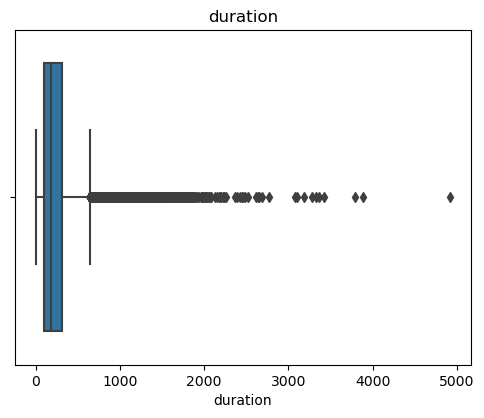

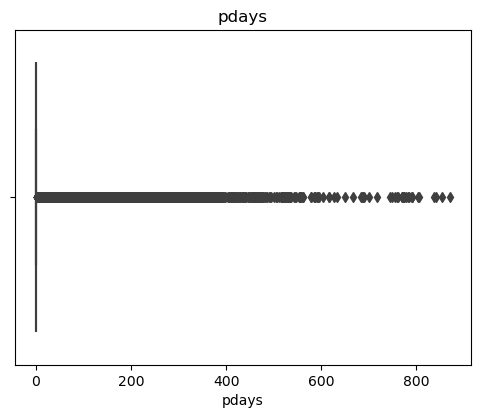

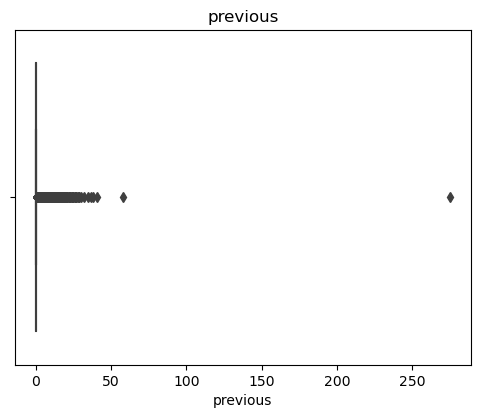

In [47]:
col=df[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
    n=1
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,1)
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    n=n+1
 

In [48]:
from scipy import stats

# Removing Outliers

In [49]:
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape


            age   balance  duration  campaign     pdays  previous
0      1.415793  0.187933  0.832754  0.245906  0.408555  0.237059
1      0.937156  0.449397  0.649957  0.245906  0.408555  0.237059
2      1.313627  0.156159  0.070449  0.567059  0.408555  0.237059
3      1.509911  0.635055  2.368149  0.567059  0.447299  1.001336
4      0.937156  0.411091  0.474054  0.567059  0.408555  0.237059
...         ...       ...       ...       ...       ...       ...
31642  1.125392  0.450388  0.552724  0.245906  0.408555  0.237059
31643  1.133439  0.324903  0.699635  0.245906  0.408555  0.237059
31644  0.843038  0.347358  0.859979  0.075247  0.408555  0.237059
31645  1.509911  0.376088  0.918319  1.359859  2.994723  4.716521
31646  1.321675  0.383022  6.669728  0.245906  0.408555  0.237059

[31647 rows x 6 columns]


(28124, 16)

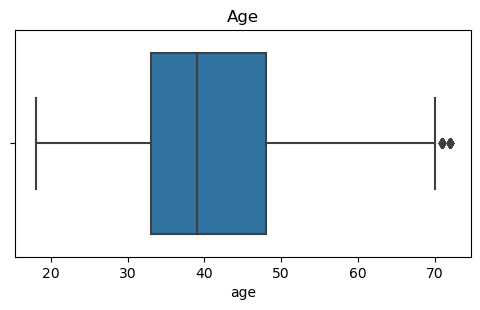

In [50]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()


# Skewness

In [51]:
df.skew()

ID            0.079376
age           0.438496
job           0.291908
education     0.199721
default       7.007588
balance       2.437605
housing      -0.203589
loan          1.787691
day           0.073752
month         0.224460
duration      1.596552
campaign      2.059359
pdays         2.824483
previous      3.691573
poutcome     -2.473077
subscribed    2.635813
dtype: float64

# Removing skewness

In [56]:

df['balance']=np.cbrt(df['balance'])

df['duration']=np.cbrt(df['duration'])
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])


In [57]:
df.skew()

ID            0.079376
age           0.438496
job           0.291908
education     0.199721
default       7.007588
balance      -1.884006
housing      -0.203589
loan          1.787691
day           0.073752
month         0.224460
duration      0.310493
campaign      0.997328
pdays         2.186152
previous      2.299676
poutcome     -2.473077
subscribed    2.635813
dtype: float64

In [59]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# Scaling of data

In [61]:
#split x and y
x = df.drop(['subscribed'], axis=1)
y=df.subscribed

In [62]:
x.shape

(28124, 15)

In [63]:
y.shape

(28124,)

In [64]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled


array([[ 0.34151241,  1.52281062, -1.27741816, ..., -0.3970026 ,
        -0.39283156,  0.37763179],
       [ 1.46195128, -0.95736799,  0.08192606, ..., -0.3970026 ,
        -0.39283156,  0.37763179],
       [-0.49420828, -1.35419657,  0.89753259, ..., -0.3970026 ,
        -0.39283156,  0.37763179],
       ...,
       [ 1.14493508, -1.15578228, -0.18994279, ..., -0.3970026 ,
        -0.39283156,  0.37763179],
       [ 1.43112488,  1.22518918, -0.18994279, ..., -0.3970026 ,
        -0.39283156,  0.37763179],
       [-0.15418847, -0.85816085, -0.18994279, ..., -0.3970026 ,
        -0.39283156,  0.37763179]])

# Variance Inflation Factor

In [65]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif

,vif,features
0,1.345796,ID
1,1.054857,age
2,1.033930,job
3,1.053724,education
4,1.066151,default
5,1.100508,balance
6,1.142232,housing
7,1.030574,loan
8,1.029851,day
9,1.051347,month


# Modelling of data 

In [66]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [67]:
y_train.head()

3017     0
5097     0
27515    0
18931    0
24588    0
Name: subscribed, dtype: int64

# KNN

Mean absolute error : 0.08458140286607047
Mean squared error : 0.08458140286607047
Root Mean Squared Error: 0.29082882055613135


0.1019872037596905
ROC_AUC Score: 0.7160664415457414
[[8036  696]
 [ 268  281]]


<AxesSubplot:>

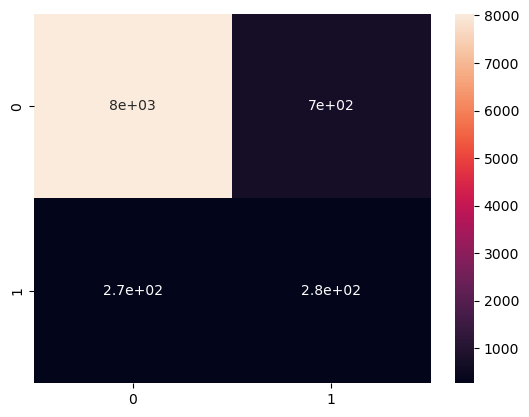

In [78]:
# KNN or k-Nearest Neighbors


knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

acc_knn=accuracy_score(y_test,y_predict)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))
AUC_KN=roc_auc_score(y_predict,y_test)
print("ROC_AUC Score:",AUC_KN)
cm=confusion_matrix(y_predict,y_test)
print(cm)

sns.heatmap(cm,annot=True)
  

# RandomForest Classifier

Mean absolute error : 0.08436590884602953
Mean squared error : 0.08436590884602953
Root Mean Squared Error: 0.2904581017049267


0.10427513445074865
ROC_AUC Score: 0.792643663490511
[[8077  227]
 [ 556  421]]


<AxesSubplot:>

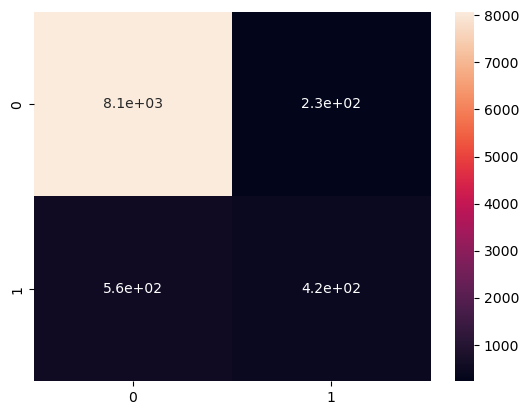

In [79]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)
     

# Logistic Regression

Mean absolute error : 0.08436590884602953
Mean squared error : 0.08436590884602953
Root Mean Squared Error: 0.2904581017049267


0.10427513445074865
ROC_AUC Score: 0.6528749077352283
[[8145  159]
 [ 870  107]]


<AxesSubplot:>

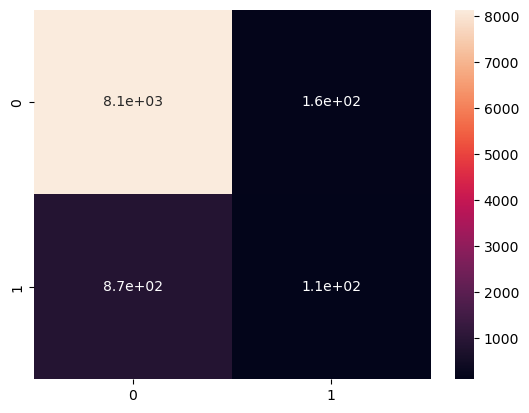

In [80]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

acc_lr=accuracy_score(y_test,pred)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))
AUC_LR=roc_auc_score(pred,y_test)

print("ROC_AUC Score:",AUC_LR)

cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)
 

# Decision Tree Classifier

Mean absolute error : 0.08436590884602953
Mean squared error : 0.08436590884602953
Root Mean Squared Error: 0.2904581017049267


0.10427513445074865
ROC_AUC Score: 0.7099687010841921
[[7780  524]
 [ 494  483]]


<AxesSubplot:>

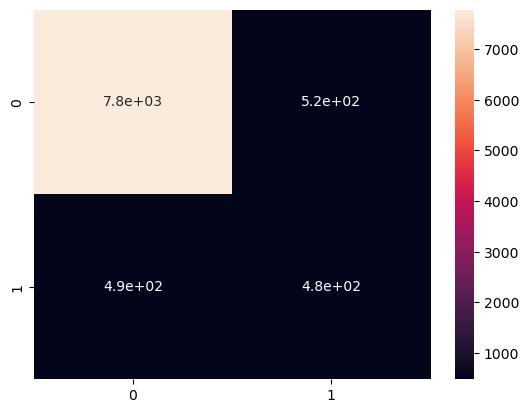

In [81]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

acc_dt=accuracy_score(y_test,pred)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))
AUC_dt=roc_auc_score(pred,y_test)

print("ROC_AUC Score:",AUC_dt)

cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)
 

# Grid Search CV

In [82]:
rf = RandomForestClassifier()
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }
 

In [84]:
from sklearn.model_selection import GridSearchCV #import libary

In [85]:
grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(x,y)

In [86]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best score is: 0.9231972235260649


# We can see that RandomForest classifier gives highest Roc_Auc score

In [87]:
Model=RandomForestClassifier(max_depth=10,max_features=7,min_samples_leaf=1,min_samples_split=3,n_estimators=200)


In [88]:
import joblib
import pickle

In [89]:
filename="Bank Marketting.pkl"
pickle.dump(Model,open(filename,'wb'))